In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Colormap

In [2]:
cur_dir = "~/IMR/echo-test/hackathon/"
files = "OOI-D20170821-T163049.nc"

In [3]:
# Open with Xarray, select the beam group
# if we use chunk, we will get almost functionality with numpy's memmap array
# i.e., data is loaded lazyly and per-chunk

ds = xr.open_dataset(cur_dir + files, group = "Beam", chunks={'ping_time': 100})
ds

<xarray.Dataset>
Dimensions:                         (frequency: 3, ping_time: 5923, range_bin: 1072)
Coordinates:
  * frequency                       (frequency) float32 1.2e+05 3.8e+04 2e+05
  * ping_time                       (ping_time) datetime64[ns] 2017-08-21T16:...
  * range_bin                       (range_bin) int32 0 1 2 3 ... 1069 1070 1071
Data variables:
    backscatter_r                   (frequency, ping_time, range_bin) float64 dask.array<chunksize=(3, 100, 1072), meta=np.ndarray>
    angle_athwartship               (frequency, ping_time, range_bin) float64 dask.array<chunksize=(3, 100, 1072), meta=np.ndarray>
    angle_alongship                 (frequency, ping_time, range_bin) float64 dask.array<chunksize=(3, 100, 1072), meta=np.ndarray>
    beam_type                       (frequency) int32 dask.array<chunksize=(3,), meta=np.ndarray>
    beamwidth_receive_alongship     (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    beamwidth_receive_athwartship   (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    beamwidth_transmit_alongship    (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    beamwidth_transmit_athwartship  (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    beam_direction_x                (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    beam_direction_y                (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    beam_direction_z                (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    angle_offset_alongship          (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    angle_offset_athwartship        (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    angle_sensitivity_alongship     (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    angle_sensitivity_athwartship   (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    equivalent_beam_angle           (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    gain_correction                 (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    non_quantitative_processing     (frequency) int32 dask.array<chunksize=(3,), meta=np.ndarray>
    sample_interval                 (frequency) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    sample_time_offset              (frequency) int32 dask.array<chunksize=(3,), meta=np.ndarray>
    transmit_bandwidth              (frequency) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    transmit_duration_nominal       (frequency) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    transmit_power                  (frequency) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    transducer_offset_x             (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    transducer_offset_y             (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    transducer_offset_z             (frequency) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    channel_id                      (frequency) object dask.array<chunksize=(3,), meta=np.ndarray>
    gpt_software_version            (frequency) object dask.array<chunksize=(3,), meta=np.ndarray>
    sa_correction                   (frequency) float64 dask.array<chunksize=(3,), meta=np.ndarray>
Attributes:
    beam_mode:              vertical
    conversion_equation_t:  type_3

In [4]:
da = ds['backscatter_r']
print(da)
da

<xarray.DataArray 'backscatter_r' (frequency: 3, ping_time: 5923, range_bin: 1072)>
dask.array<open_dataset-b86a9eaf74d14a034c40fcfe6e8b1bc8backscatter_r, shape=(3, 5923, 1072), dtype=float64, chunksize=(3, 100, 1072), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float32 1.2e+05 3.8e+04 2e+05
  * ping_time  (ping_time) datetime64[ns] 2017-08-21T16:30:49.164000256 ... 2...
  * range_bin  (range_bin) int32 0 1 2 3 4 5 6 ... 1066 1067 1068 1069 1070 1071
Attributes:
    long_name:  Backscatter power
    units:      dB


<xarray.DataArray 'backscatter_r' (frequency: 3, ping_time: 5923, range_bin: 1072)>
dask.array<open_dataset-b86a9eaf74d14a034c40fcfe6e8b1bc8backscatter_r, shape=(3, 5923, 1072), dtype=float64, chunksize=(3, 100, 1072), chunktype=numpy.ndarray>
Coordinates:
  * frequency  (frequency) float32 1.2e+05 3.8e+04 2e+05
  * ping_time  (ping_time) datetime64[ns] 2017-08-21T16:30:49.164000256 ... 2...
  * range_bin  (range_bin) int32 0 1 2 3 4 5 6 ... 1066 1067 1068 1069 1070 1071
Attributes:
    long_name:  Backscatter power
    units:      dB

In [5]:
# Getting the variables
ping_time = da.coords['ping_time']
print(ping_time)
range_bin = da.coords['range_bin']
print(range_bin)

<xarray.DataArray 'ping_time' (ping_time: 5923)>
array(['2017-08-21T16:30:49.164000256', '2017-08-21T16:30:50.167000064',
       '2017-08-21T16:30:51.170999808', ..., '2017-08-21T18:09:49.544999936',
       '2017-08-21T18:09:50.547999744', '2017-08-21T18:09:51.551000064'],
      dtype='datetime64[ns]')
Coordinates:
  * ping_time  (ping_time) datetime64[ns] 2017-08-21T16:30:49.164000256 ... 2...
Attributes:
    axis:           T
    long_name:      Timestamp of each ping
    standard_name:  time
<xarray.DataArray 'range_bin' (range_bin: 1072)>
array([   0,    1,    2, ..., 1069, 1070, 1071], dtype=int32)
Coordinates:
  * range_bin  (range_bin) int32 0 1 2 3 4 5 6 ... 1066 1067 1068 1069 1070 1071


In [6]:
# Acccessing single data (wrong)
print(da[0,0,0])

<xarray.DataArray 'backscatter_r' ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    frequency  float32 1.2e+05
    ping_time  datetime64[ns] 2017-08-21T16:30:49.164000256
    range_bin  int32 0
Attributes:
    long_name:  Backscatter power
    units:      dB


In [7]:
# Acccessing single data (right)
print(da[0,0,0].load())

<xarray.DataArray 'backscatter_r' ()>
array(12.07647678)
Coordinates:
    frequency  float32 1.2e+05
    ping_time  datetime64[ns] 2017-08-21T16:30:49.164000256
    range_bin  int32 0
Attributes:
    long_name:  Backscatter power
    units:      dB


In [8]:
# Accessing using labels (freq= 38khz, time = ...)
da_sub = da.loc["3.8e+04", "2017-08-21T16:30":"2017-08-21T16:31"]
da_sub

<xarray.DataArray 'backscatter_r' (ping_time: 71, range_bin: 1072)>
dask.array<getitem, shape=(71, 1072), dtype=float64, chunksize=(71, 1072), chunktype=numpy.ndarray>
Coordinates:
    frequency  float32 3.8e+04
  * ping_time  (ping_time) datetime64[ns] 2017-08-21T16:30:49.164000256 ... 2...
  * range_bin  (range_bin) int32 0 1 2 3 4 5 6 ... 1066 1067 1068 1069 1070 1071
Attributes:
    long_name:  Backscatter power
    units:      dB

In [9]:
# Still traditional index works
da_sub[0,0]

<xarray.DataArray 'backscatter_r' ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    frequency  float32 3.8e+04
    ping_time  datetime64[ns] 2017-08-21T16:30:49.164000256
    range_bin  int32 0
Attributes:
    long_name:  Backscatter power
    units:      dB

In [10]:
# Prepare simrad cmap
simrad_color_table = [(1, 1, 1),
                                    (0.6235, 0.6235, 0.6235),
                                    (0.3725, 0.3725, 0.3725),
                                    (0, 0, 1),
                                    (0, 0, 0.5),
                                    (0, 0.7490, 0),
                                    (0, 0.5, 0),
                                    (1, 1, 0),
                                    (1, 0.5, 0),
                                    (1, 0, 0.7490),
                                    (1, 0, 0),
                                    (0.6509, 0.3255, 0.2353),
                                    (0.4705, 0.2353, 0.1568)]
simrad_cmap = (LinearSegmentedColormap.from_list
                             ('Simrad', simrad_color_table))
simrad_cmap.set_bad(color='grey')

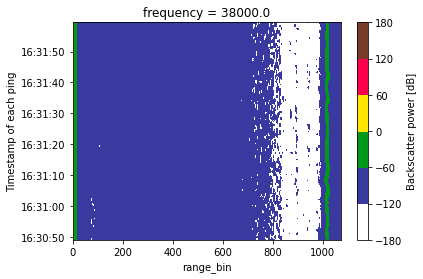

In [11]:
# Plot it using simple contour
da_sub.plot.contourf(cmap=simrad_cmap)